In [4]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet
!git clone https://github.com/comp195/spring-2021-final-project-ai-eye.git
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make
%cd /content/darknet/

# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline
  image = plt.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)



fatal: destination path 'darknet' already exists and is not an empty directory.
Cloning into 'spring-2021-final-project-ai-eye'...
remote: Enumerating objects: 190, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (163/163), done.
remote: Total 190 (delta 72), reused 92 (delta 21), pack-reused 0
Receiving objects: 100% (190/190), 27.64 MiB | 21.01 MiB/s, done.
Resolving deltas: 100% (72/72), done.
[Errno 20] Not a directory: 'darknet'
/content/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image*

In [ ]:
upload()


In [12]:
from google.colab import drive
drive.mount('/content/drive')
!ln -s /content/drive/My\ Drive/ /mydrive

!cp /mydrive/SeniorProject/dataset/obj.zip ../
!cp /mydrive/SeniorProject/dataset/test.zip ../
!unzip ../obj.zip -d data/
!unzip ../test.zip -d data/
!cp /mydrive/SeniorProject/dataset/yolov4-obj.cfg ./cfg
!cp /mydrive/SeniorProject/dataset/obj.names ./data
!cp /mydrive/SeniorProject/dataset/obj.data  ./data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
Archive:  ../obj.zip
replace data/obj/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  ../test.zip
replace data/test/00037.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

/content/darknet/cfg
/content/darknet
 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs:

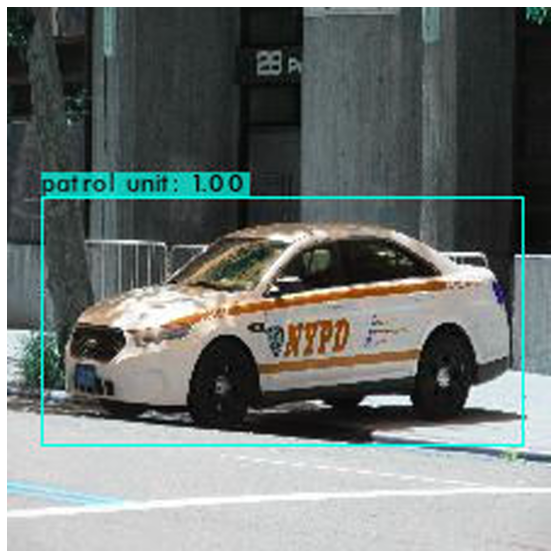

In [14]:

%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /mydrive/SeniorProject/dataset/backup/yolov4-obj_last.weights data/test/65.jpg -thresh 0.3

imShow('predictions.jpg')
